<a href="https://colab.research.google.com/github/GUNA1112/ml-projects/blob/main/CREDIT_CARD_FRAUD_DETECTION_using_XGBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!apt-get install unzip
!unzip /content/drive/MyDrive/datasets/credicard.zip -d /content/dataset1


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
unzip is already the newest version (6.0-26ubuntu3.2).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
Archive:  /content/drive/MyDrive/datasets/credicard.zip
  inflating: /content/dataset1/creditcard.csv  


Dataset Overview:

Transactions: The dataset contains credit card transactions made by European cardholders over two days in September 2013.

Fraudulent Transactions: Out of 284,807 total transactions, only 492 were fraudulent. This means that the vast majority of transactions are legitimate.

Imbalanced Data: The dataset is highly imbalanced, with a very small percentage (0.172%) of fraudulent transactions. This imbalance can pose challenges for machine learning models.

Data Anonymization: The dataset has undergone Principal Component Analysis (PCA) to maintain confidentiality. This means that the original features (like card number, customer details) have been transformed into principal components (V1, V2, ..., V28).
Time Feature: The 'time' feature represents the seconds elapsed between the first transaction in the dataset and each subsequent transaction.
Amount Feature: The 'amount' feature represents the transaction amount.

Class Feature: The 'class' feature is the target variable, indicating whether a transaction is fraudulent (1) or legitimate (0).

In [ ]:
import pandas as pd

# Load the data into a pandas DataFrame
data = pd.read_csv('/content/dataset1/creditcard.csv')

# Display the first 300 columns
display(data.iloc[:, :300])

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier  # Import XGBoost classifier
from sklearn.metrics import classification_report, confusion_matrix

# Load the dataset
data = pd.read_csv('/content/dataset1/creditcard.csv')

# Separate features (X) and target (y)
X = data.drop('Class', axis=1)
y = data['Class']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
data.shape

(284807, 31)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
# Loading dataset
data = pd.read_csv('/content/dataset1/creditcard.csv')  # Replace with your file path

# 1. Check for missing values in each column:
missing_values = data.isnull().sum()
print("Missing values per column:\n", missing_values)

# 2. Calculate the percentage of missing values in each column:
missing_percentage = (data.isnull().sum() / len(data)) * 100
print("\nPercentage of missing values per column:\n", missing_percentage)

# 3. Identify columns with any missing values:
columns_with_missing = data.columns[data.isnull().any()].tolist()
print("\nColumns with missing values:", columns_with_missing)

# 4. Create a DataFrame to summarize missing data:
missing_data_summary = pd.DataFrame({
    'Missing Values': data.isnull().sum(),
    'Percentage': missing_percentage
})
missing_data_summary = missing_data_summary[missing_data_summary['Missing Values'] > 0].sort_values(
    'Percentage', ascending=False)
print("\nSummary of missing data:\n", missing_data_summary)

Missing values per column:
 Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Percentage of missing values per column:
 Time      0.0
V1        0.0
V2        0.0
V3        0.0
V4        0.0
V5        0.0
V6        0.0
V7        0.0
V8        0.0
V9        0.0
V10       0.0
V11       0.0
V12       0.0
V13       0.0
V14       0.0
V15       0.0
V16       0.0
V17       0.0
V18       0.0
V19       0.0
V20       0.0
V21       0.0
V22       0.0
V23       0.0
V24       0.0
V25       0.0
V26       0.0
V27       0.0
V28       0.0
Amount    0.0
Class     0.0
dtype: float64

Columns with missing values: []

Summary of missing data:
 Empty DataFrame
Columns: [Missing V

class distribution

Class Distribution:
 Class
0    284315
1       492
Name: count, dtype: int64

Class Percentage:
 Class
0    99.827251
1     0.172749
Name: count, dtype: float64


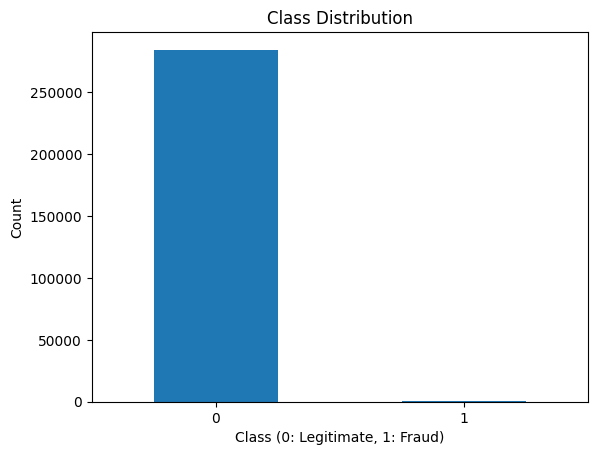

In [ ]:
# Check the distribution of the 'Class' column
class_distribution = data['Class'].value_counts()
print("Class Distribution:\n", class_distribution)

# Calculate the percentage of each class
class_percentage = (class_distribution / len(data)) * 100
print("\nClass Percentage:\n", class_percentage)

# Visualize the distribution using a bar plot (optional)
import matplotlib.pyplot as plt
class_distribution.plot(kind='bar', rot=0)
plt.title('Class Distribution')
plt.xlabel('Class (0: Legitimate, 1: Fraud)')
plt.ylabel('Count')
plt.show()

In [ ]:
# Creating fraudulent dataframe
data_fraud = data[data['Class'] == 1]
# Creating non fraudulent dataframe
data_non_fraud = data[data['Class'] == 0]

<ipython-input-12-9ac824b344bb>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(data_fraud['Time'],label='fraudulent',hist=False)
<ipython-input-12-9ac824b344bb>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(data_non_fraud['Time'],label='non fraudulent',hist=False

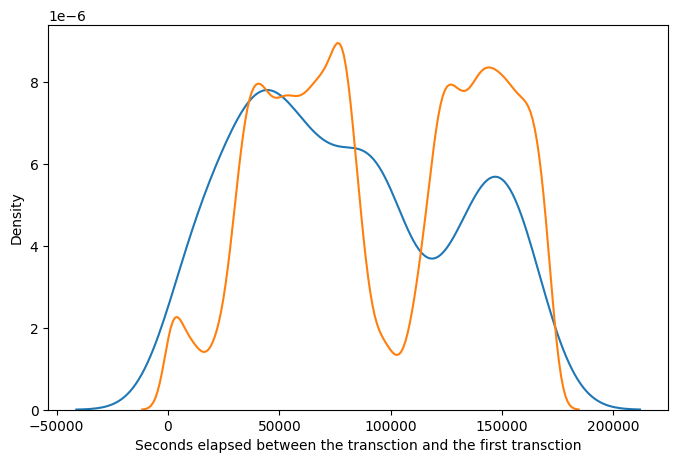

In [ ]:
# Distribution plot
import seaborn as sns # Import the seaborn library
import matplotlib.pyplot as plt # Import the matplotlib library for plotting

plt.figure(figsize=(8,5))
ax = sns.distplot(data_fraud['Time'],label='fraudulent',hist=False)
ax = sns.distplot(data_non_fraud['Time'],label='non fraudulent',hist=False)
ax.set(xlabel='Seconds elapsed between the transction and the first transction')
plt.show()

<ipython-input-13-508d22503106>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(data_fraud['Amount'],label='fraudulent',hist=False)
<ipython-input-13-508d22503106>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(data_non_fraud['Time'],label='non fraudulent',hist=Fal

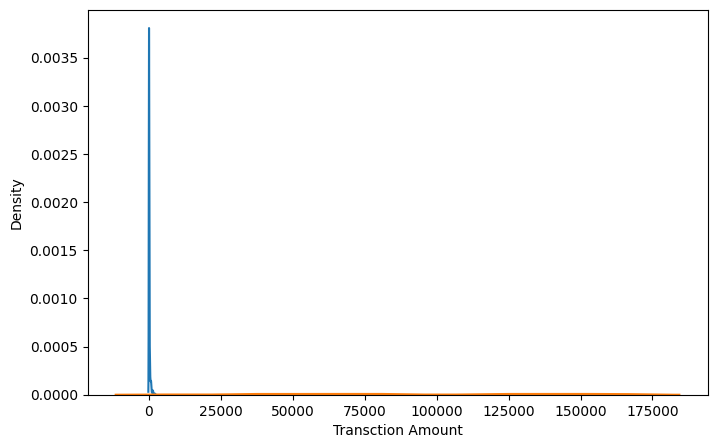

In [ ]:
# Distribution plot
plt.figure(figsize=(8,5))
ax = sns.distplot(data_fraud['Amount'],label='fraudulent',hist=False)
ax = sns.distplot(data_non_fraud['Time'],label='non fraudulent',hist=False)
ax.set(xlabel='Transction Amount')
plt.show()

**Feature Scaling**

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Convert X_train to a pandas DataFrame
X_train = pd.DataFrame(X_train, columns=data.columns[:-1]) # Assuming 'Class' is the last column in 'data'

# Now you can use column names for indexing
X_train['Amount'] = scaler.fit_transform(X_train[['Amount']])

# Min-Max Scaling
scaler = MinMaxScaler()
data['Amount'] = scaler.fit_transform(data[['Amount']]) # Use [['Amount']] to maintain DataFrame structure

In [ ]:
X_train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,1.022555,0.997851,-0.229626,-0.207385,0.234215,-0.367791,-0.064022,-0.505889,0.030604,0.959955,...,-0.162507,0.324839,1.336699,0.084569,-0.459802,-0.084368,-0.448942,0.112489,-0.143741,-0.307889
1,0.471283,-0.205221,-0.378220,1.027544,-1.424101,-0.078380,0.126364,0.013567,-0.337559,0.035913,...,-0.608195,-0.209797,0.583086,0.180620,-1.658084,-2.253352,0.750588,-0.921898,-0.439841,-0.167026
2,1.153387,0.036558,0.495563,-0.370033,-0.500363,0.777856,-0.268414,0.632710,0.098986,-0.120484,...,0.015283,-0.429767,-1.201892,0.132700,0.245102,-0.825048,0.248488,0.513730,0.212358,-0.300043
3,-0.023638,-0.273682,0.612684,1.156521,1.957021,0.359664,0.750211,0.680997,-0.068094,0.337677,...,-0.328347,0.086416,0.613043,-0.116294,0.740628,-1.253870,-0.374857,-0.231400,-0.197676,0.113600
4,-0.255590,-2.056777,1.145573,-0.283165,-0.019856,-0.617403,-0.358912,-0.351206,1.105586,0.487524,...,-0.016430,-0.656425,-0.315939,0.399524,0.110028,0.904176,0.508925,0.714090,-0.979240,-0.246029


In [ ]:
import pandas as pd

# Convert X_test to a pandas DataFrame if it's not already
if not isinstance(X_test, pd.DataFrame):
    X_test = pd.DataFrame(X_test, columns=data.columns[:-1])  # Assuming 'Class' is the last column in 'data' and X_test has the same columns as X_train

# Now you can use column names for indexing
X_test['Amount'] = scaler.transform(X_test[['Amount']])
X_test.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.122118,-8.439536,5.182520,-12.313250,6.714731,-9.941032,-2.118335,-13.432184,6.324646,-7.751824,...,-1.957670,1.625033,-1.553067,-3.761355,1.112700,-2.707590,-0.958811,-5.023504,-3.162942,0.000042
1,-1.064083,0.173053,-1.656020,-0.087914,-0.977696,-1.046658,0.760397,-0.422576,0.188824,0.818900,...,0.653254,-0.291628,-1.297804,-0.840364,-1.910621,0.598336,-1.547242,0.102105,0.308635,0.000066
2,-1.248907,0.714217,-0.356343,0.111941,-0.726413,-0.389722,0.030713,-0.573914,0.002256,-0.886254,...,0.274506,0.139476,0.233672,-0.266007,-1.337914,0.969908,-0.481194,0.028472,0.013272,-0.000009
3,1.523119,-0.221100,0.994978,-1.101614,-0.245821,0.565546,-0.471300,0.221876,0.493344,-0.442509,...,-0.316560,0.489638,1.206214,-0.285147,-0.028002,-0.395606,-0.326598,-0.590698,0.005085,-0.000013
4,1.551547,1.028040,-0.082706,-0.670116,0.232177,-0.132003,-0.715109,0.033898,-0.134913,0.330080,...,-0.330331,-0.326037,-0.848169,0.553132,0.102038,-0.688466,0.362575,-0.194145,-0.214776,-0.000013


In [ ]:
cols = X_train.columns
cols

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

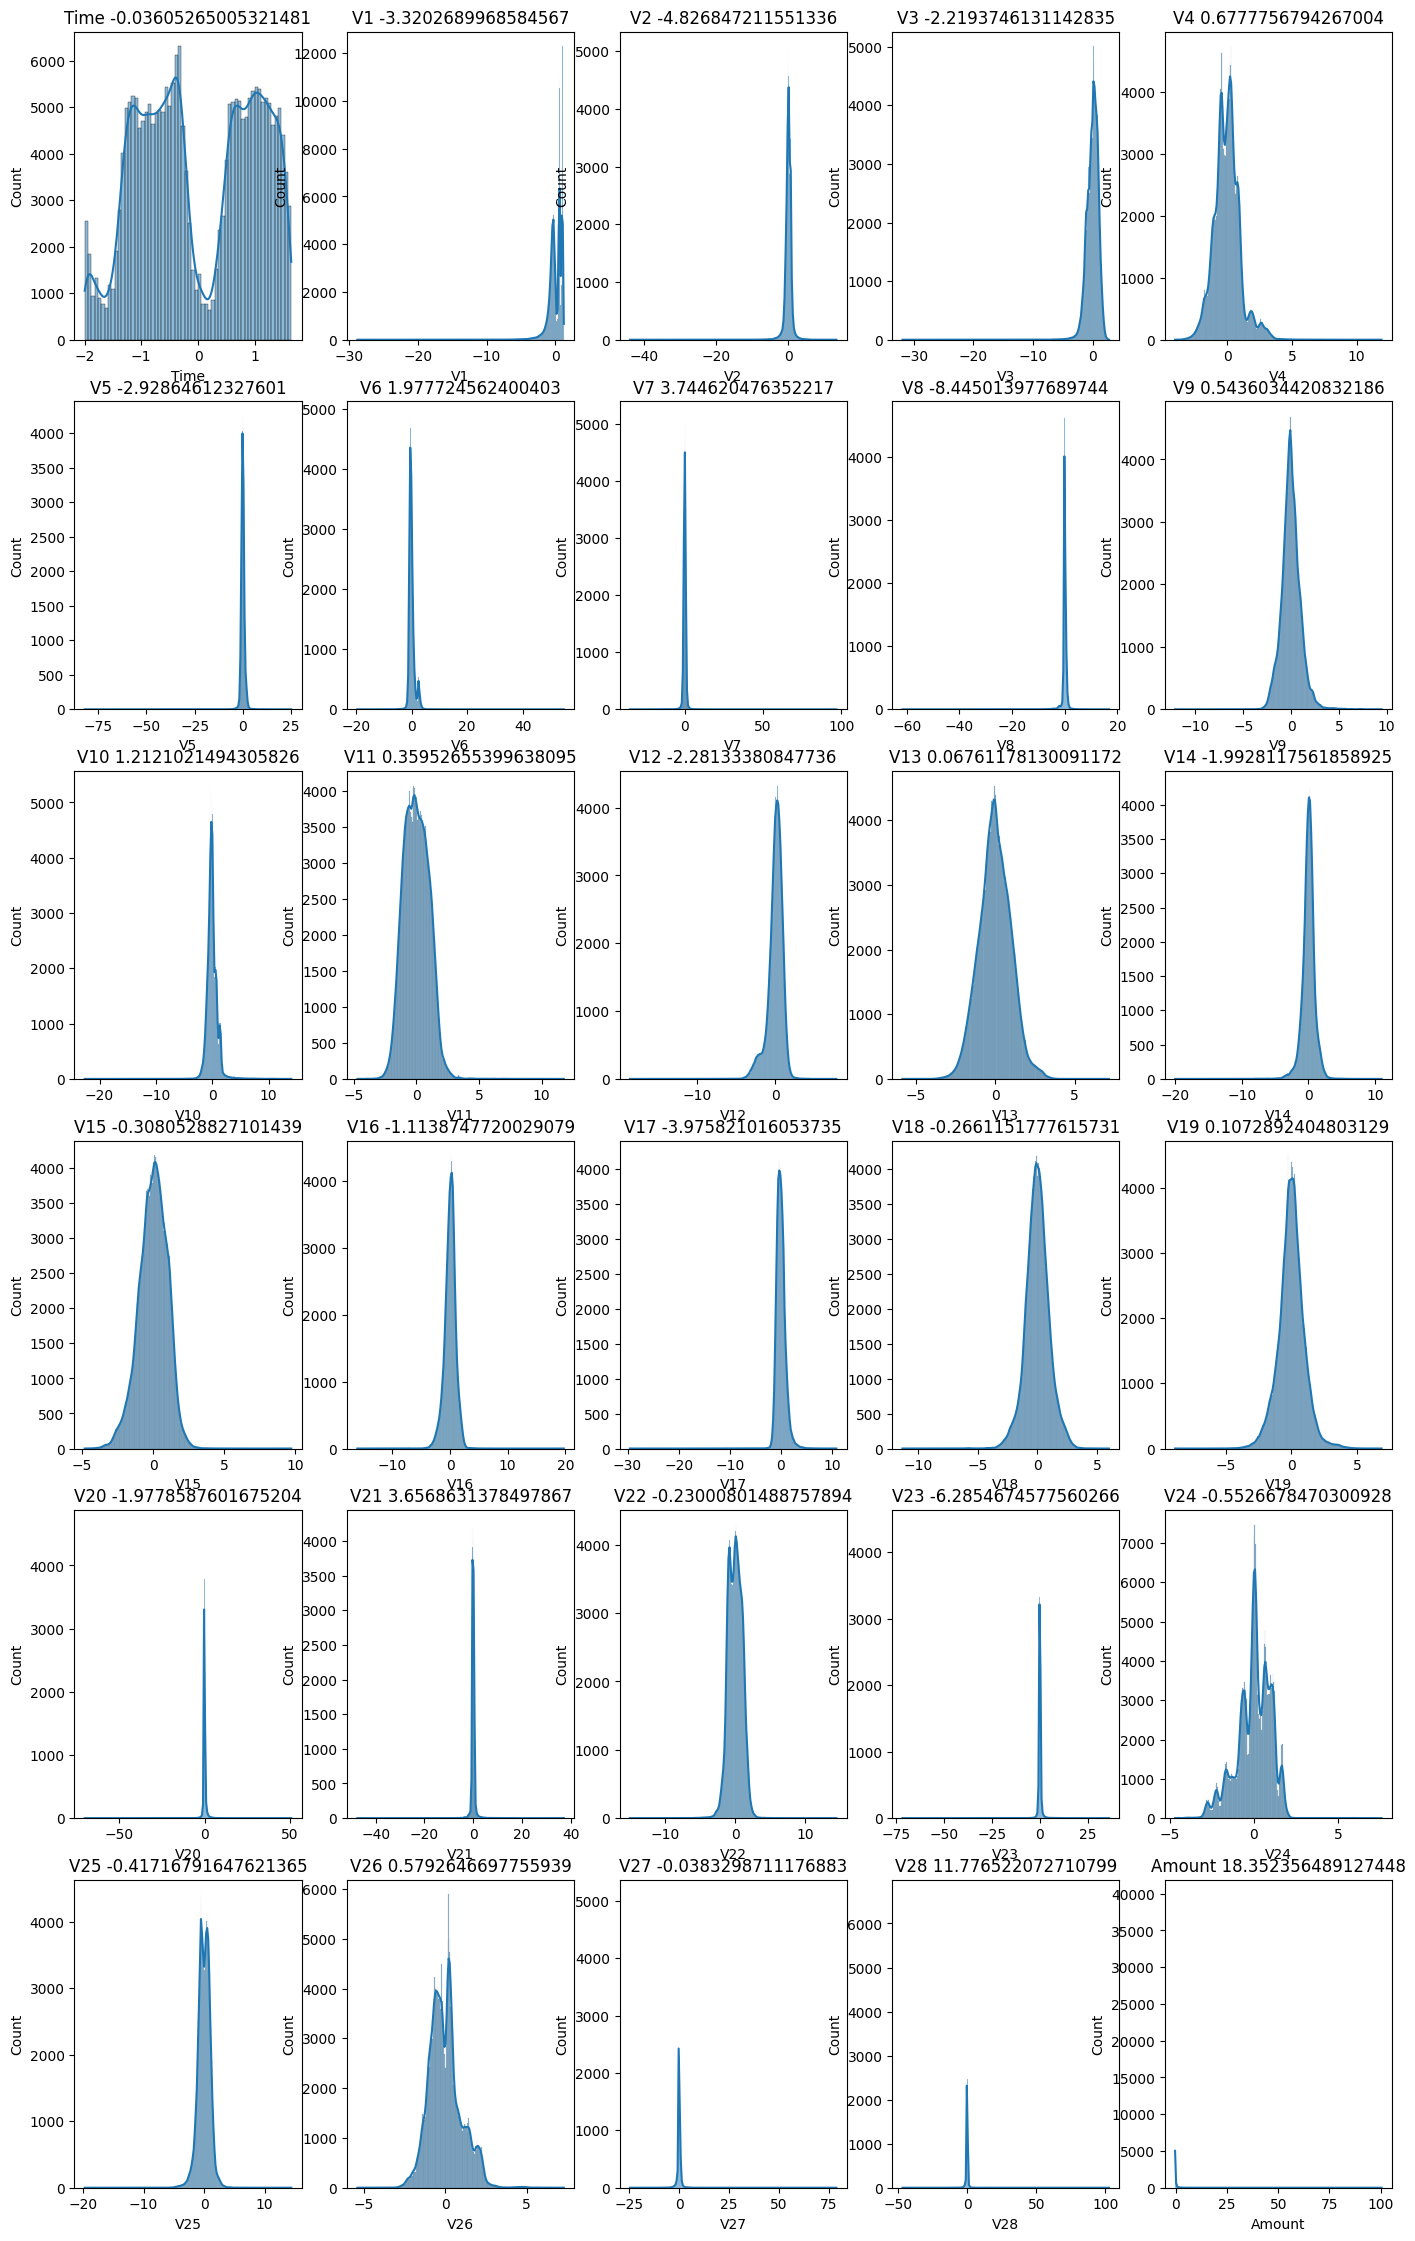

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

k = 0
plt.figure(figsize=(17, 28))
for col in cols:
    k = k + 1
    plt.subplot(6, 5, k)
    sns.histplot(X_train[col], kde=True)  # Use histplot with kde=True for density curve
    plt.title(col + ' ' + str(X_train[col].skew()))

plt.show()

In [ ]:
# Importing PowerTransformer
from sklearn.preprocessing import PowerTransformer
# Instantiate the powertransformer
pt = PowerTransformer(method='yeo-johnson', standardize=True, copy=False)
# Fit and transform the PT on training data
X_train[cols] = pt.fit_transform(X_train)

In [ ]:
X_test[cols] = pt.transform(X_test)

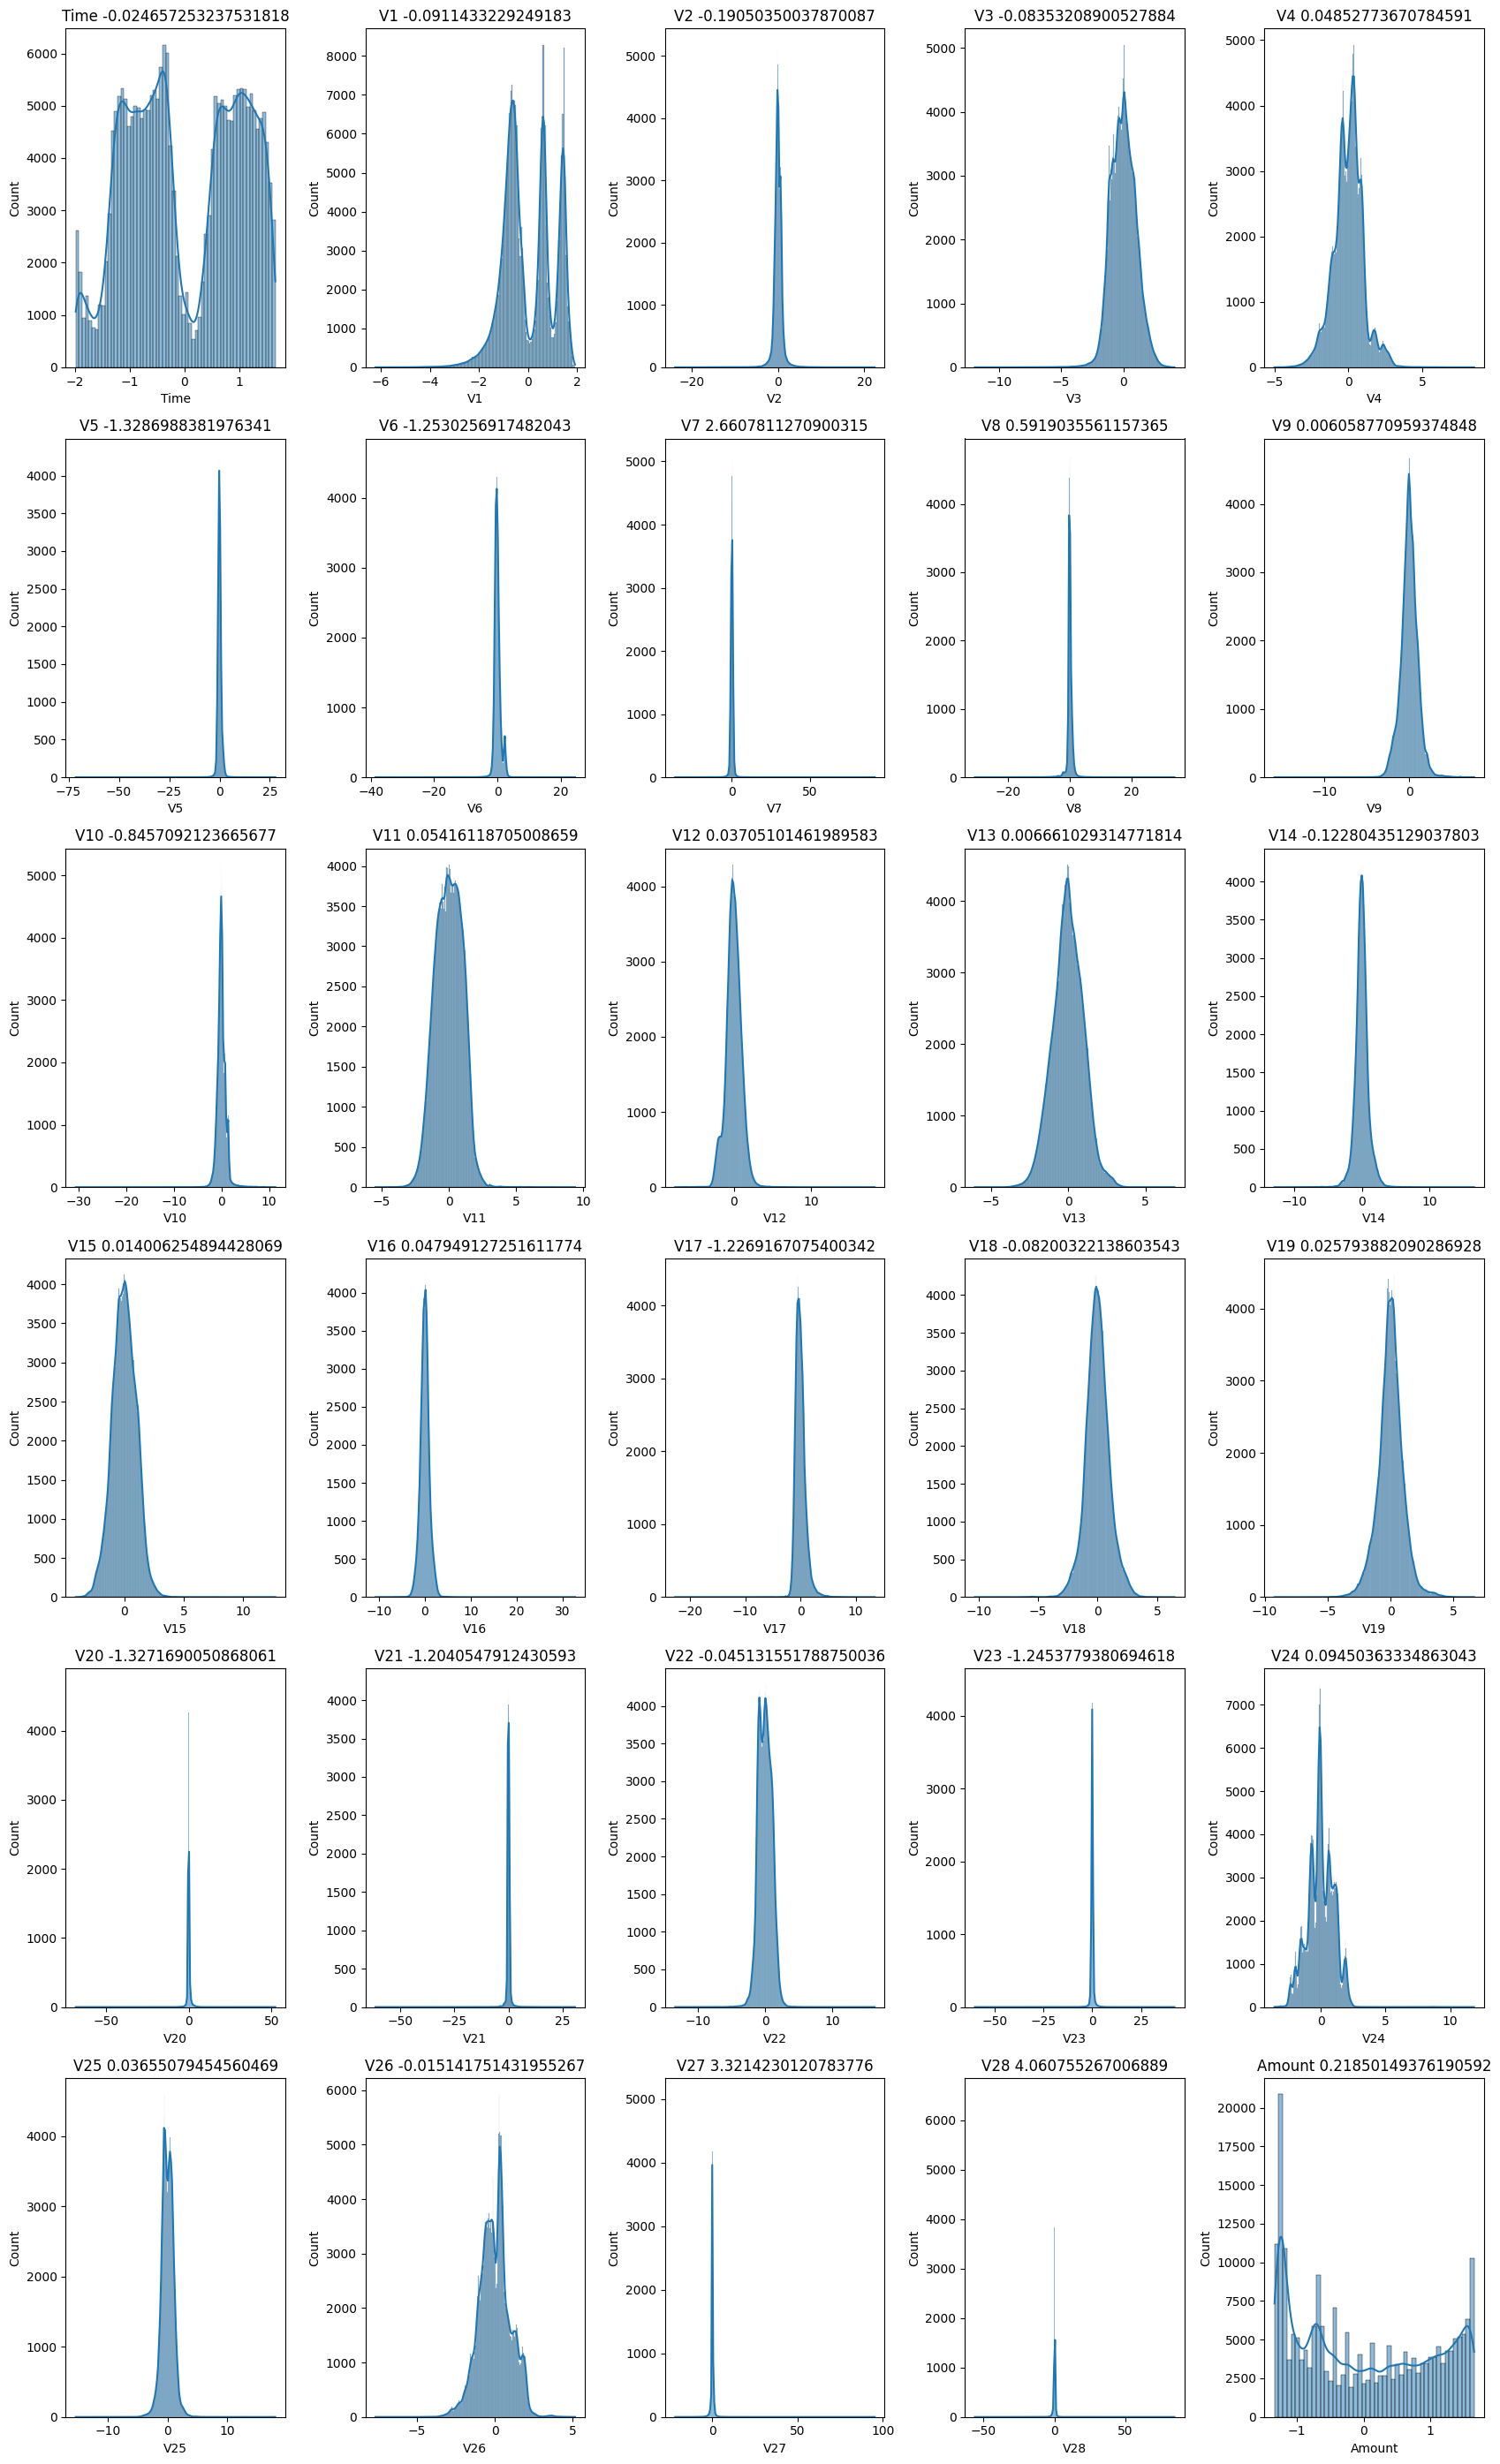

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the distribution of the variables (skewness) of all the columns
k = 0
plt.figure(figsize=(17, 28))
for col in cols:
    k += 1
    plt.subplot(6, 5, k)
    sns.histplot(X_train[col], kde=True)  # Use histplot with kde=True for density curve
    plt.title(col + ' ' + str(X_train[col].skew()))

plt.tight_layout()  # Adjust subplot parameters for a tight layout
plt.show()

In [ ]:
# Importing XGBoost
from xgboost import XGBClassifier

# Importing GridSearchCV
from sklearn.model_selection import GridSearchCV # import GridSearchCV

# creating a KFold object
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6],
             'subsample': [0.3, 0.6, 0.9]}


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model,
                        param_grid = param_grid,
                        scoring= 'roc_auc',
                        cv = folds,
                        verbose = 1,
                        return_train_score=True)

# fit the model
model_cv.fit(X_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=2,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=200,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [ ]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,4.732622,1.846924,0.142283,0.006039,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.971862,0.977976,0.991925,0.980588,0.008396,3,0.999906,0.999863,0.999591,0.999787,0.000140
1,3.980094,0.578708,0.179729,0.058653,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.979548,0.984503,0.990257,0.984769,0.004376,1,0.999800,0.999957,0.999932,0.999897,0.000069
2,4.177341,1.313310,0.137051,0.003393,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.980823,0.978148,0.988779,0.982583,0.004515,2,0.999920,0.999879,0.999856,0.999885,0.000026
3,4.727301,1.727606,0.153329,0.008418,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.971283,0.947633,0.988634,0.969183,0.016804,6,0.999964,0.999992,0.999988,0.999982,0.000012
4,4.676991,1.515304,0.174714,0.050781,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.978963,0.960351,0.984911,0.974742,0.010461,5,1.000000,1.000000,1.000000,1.000000,0.000000
5,5.258938,1.549721,0.163473,0.038186,0.6,0.9,"{'learning_rate': 0.6, 'subsample': 0.9}",0.979168,0.974597,0.986569,0.980111,0.004933,4,1.000000,1.000000,1.000000,1.000000,0.000000


In [ ]:
import pandas as pd

cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

# Convert problematic columns to strings to avoid complex data types
for col in cv_results.select_dtypes(include=['object']).columns:
  if col not in ['params']: # Exclude 'params' for detailed analysis later
    cv_results[col] = cv_results[col].astype(str)

# Convert 'params' column to string representation of the dictionary
cv_results['params'] = cv_results['params'].apply(str)

from google.colab import sheets
sheet = sheets.InteractiveSheet(df=cv_results)

https://docs.google.com/spreadsheets/d/1VtSEgZp1MedoRVG6Uj9NUjOveu8XVgmXoioBvrTed18#gid=0


/usr/local/lib/python3.10/dist-packages/google/colab/sheets.py:31: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return frame.applymap(_clean_val).replace({np.nan: None})


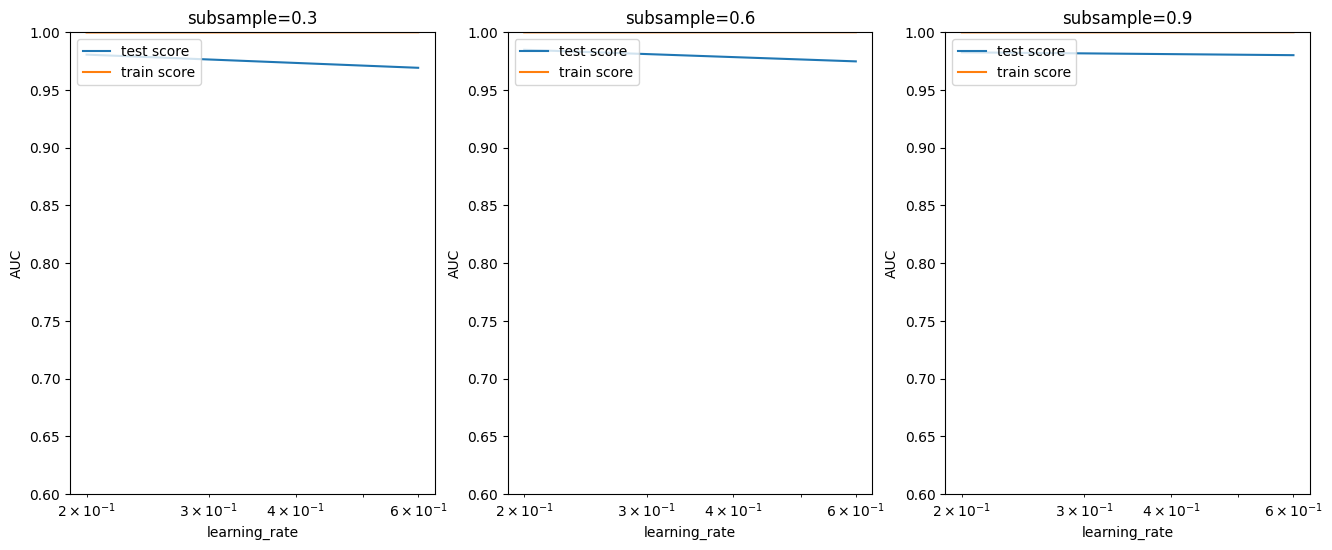

In [ ]:
# # plotting
plt.figure(figsize=(16,6))

param_grid = {'learning_rate': [0.2, 0.6],
             'subsample': [0.3, 0.6, 0.9]}


for n, subsample in enumerate(param_grid['subsample']):


    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')

In [ ]:
model_cv.best_params_

{'learning_rate': 0.2, 'subsample': 0.6}

In [ ]:
# chosen hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for calculating auc
params = {'learning_rate': 0.2,
          'max_depth': 2,
          'n_estimators':200,
          'subsample':0.6,
         'objective':'binary:logistic'}

# fit model on training data
xgb_imb_model = XGBClassifier(params = params)
xgb_imb_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:58:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "params" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None,
              params={'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.6}, ...)

In [ ]:
# Predictions on the train set
y_train_pred = xgb_imb_model.predict(X_train)

In [40]:
from sklearn import metrics # Import the metrics module from scikit-learn
from sklearn.metrics import f1_score # Import the f1_score function explicitly

# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_train, y_train_pred)) # Use the imported f1_score function

[[227451      0]
 [     0    394]]
Accuracy:- 1.0
Sensitivity:- 1.0
Specificity:- 1.0
F1-Score:- 1.0


In [41]:
# classification_report
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       1.00      1.00      1.00       394

    accuracy                           1.00    227845
   macro avg       1.00      1.00      1.00    227845
weighted avg       1.00      1.00      1.00    227845



In [42]:
# Predicted probability
y_train_pred_proba_imb_xgb = xgb_imb_model.predict_proba(X_train)[:,1]
# roc_auc
auc = metrics.roc_auc_score(y_train, y_train_pred_proba_imb_xgb)
auc

1.0

In [44]:
import matplotlib.pyplot as plt
from sklearn import metrics

def draw_roc( actual, probs ):
    """
    Draws the ROC curve.

    Args:
        actual (array-like): True labels of the data.
        probs (array-like): Predicted probabilities of the positive class.
    """
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs, drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim

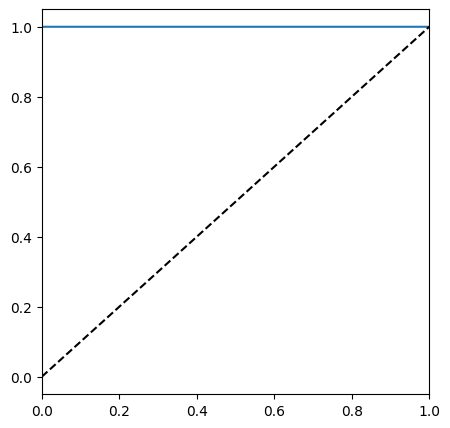

In [45]:
# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba_imb_xgb)

In [46]:
# Predictions on the test set
y_test_pred = xgb_imb_model.predict(X_test)
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[56862     2]
 [   29    69]]


In [47]:
from sklearn import metrics # Import the metrics module from scikit-learn
from sklearn.metrics import f1_score # Import the f1_score function explicitly

# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_train, y_train_pred)) # Use the imported f1_score function

[[227451      0]
 [     0    394]]
Accuracy:- 1.0
Sensitivity:- 1.0
Specificity:- 1.0
F1-Score:- 1.0


In [48]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.97      0.70      0.82        98

    accuracy                           1.00     56962
   macro avg       0.99      0.85      0.91     56962
weighted avg       1.00      1.00      1.00     56962



In [49]:
y_test_pred_proba = xgb_imb_model.predict_proba(X_test)[:,1]
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.9800932120175024

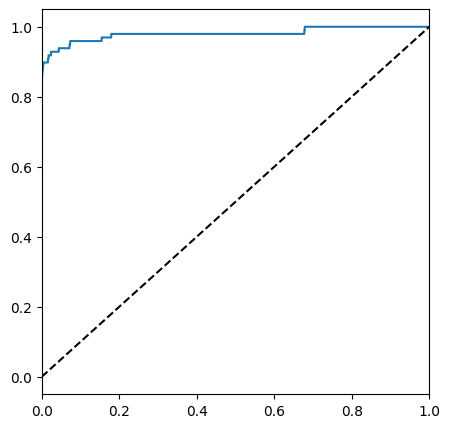

In [50]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

In [53]:
from sklearn import metrics
from sklearn.metrics import f1_score, classification_report, roc_auc_score

# ... (Your existing code for calculating metrics) ...

# Assuming you have calculated the following metrics:
# accuracy, sensitivity, specificity, f1_score, auc, etc.

# Create the train_metrics and test_metrics dictionaries
train_metrics = {
    "Accuracy": metrics.accuracy_score(y_train, y_train_pred),
    "Sensitivity": TP / float(TP + FN),
    "Specificity": TN / float(TN + FP),
    "F1-Score": f1_score(y_train, y_train_pred),
    # ... add other train metrics ...
}

test_metrics = {
    "Accuracy": metrics.accuracy_score(y_test, y_test_pred),
    # "Sensitivity": ... ,  # Calculate sensitivity for test set
    # "Specificity": ... ,  # Calculate specificity for test set
    "F1-Score": f1_score(y_test, y_test_pred),
    "AUC": metrics.roc_auc_score(y_test, y_test_pred_proba),
    # ... add other test metrics ...
}

def print_model_summary(train_metrics, test_metrics):
    """
    Prints a summary of the model's performance metrics.

    Args:
        train_metrics (dict): A dictionary containing the train metrics.
        test_metrics (dict): A dictionary containing the test metrics.
    """
    print("Train Metrics:")
    for metric, value in train_metrics.items():
        print(f"{metric}: {value}")

    print("\nTest Metrics:")
    for metric, value in test_metrics.items():
        print(f"{metric}: {value}")

print_model_summary(train_metrics, test_metrics)

Train Metrics:
Accuracy: 1.0
Sensitivity: 1.0
Specificity: 1.0
F1-Score: 1.0

Test Metrics:
Accuracy: 0.9994557775359011
F1-Score: 0.8165680473372781
AUC: 0.9800932120175024
